# data conversions

In [1]:
%matplotlib inline
pd.set_option('max_rows',12)
pd.set_option('max_seq_items',4)
pd.set_option('display.width',60)

# dates

In [2]:
idx = pd.date_range('20130101',freq='h',periods=10000)
idx

DatetimeIndex(['2013-01-01 00:00:00',
               '2013-01-01 01:00:00', 
               ...
               '2014-02-21 14:00:00',
               '2014-02-21 15:00:00'],
              dtype='datetime64[ns]', length=10000, freq='H')

In [3]:
strings = idx.strftime('%Y%m')
strings

array(['201301', '201301', '201301', ..., '201402', '201402', '201402'], 
      dtype='|S6')

In [4]:
def slow_format(strings):
    return [ pd.to_datetime(s,format='%Y%m') for s in strings ]
def reg_format(strings):
    return pd.to_datetime(strings,format='%Y%m')
def fast_format(strings):
    return pd.to_datetime(np.array(strings).astype(int)*100+1,
                          format='%Y%m%d')

In [5]:
results = [slow_format(strings), reg_format(strings), fast_format(strings)]

from itertools import imap, permutations
np.array(list(imap(lambda x: x[0] == x[1], permutations(results, 2)))).all()

True

In [6]:
t = {}

In [7]:
x = %timeit -o slow_format(strings)
t['slow'] = x.best

1 loops, best of 3: 674 ms per loop


In [8]:
x = %timeit -o reg_format(strings)
t['reg'] = x.best

10 loops, best of 3: 27.3 ms per loop


In [9]:
x = %timeit -o fast_format(strings)
t['fast'] = x.best

100 loops, best of 3: 9.97 ms per loop


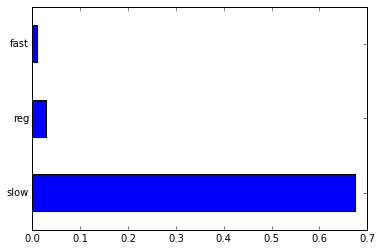

In [10]:
Series(t).sort_values(ascending=False).plot.barh()

# csv and dates

In [13]:
fn = 'data/csv_and_dates.csv'
N = 1e4
df = DataFrame({'A' : np.random.randn(N)}, 
               index=pd.date_range('20130101',freq='s',periods=N))
df.index = df.index.format(date_format='%Y/%b/%d %H:%M:%S')
df.index.name ='dates'
df.to_csv(fn)

/Users/jreback/miniconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()


In [14]:
!head 'data/csv_and_dates.csv'

dates,A
2013/Jan/01 00:00:00,0.688120883996
2013/Jan/01 00:00:01,1.06048392317
2013/Jan/01 00:00:02,-0.0884823771456
2013/Jan/01 00:00:03,0.747950611859
2013/Jan/01 00:00:04,-1.3433667236
2013/Jan/01 00:00:05,-0.486924203781
2013/Jan/01 00:00:06,3.02459196797
2013/Jan/01 00:00:07,-0.430671687294
2013/Jan/01 00:00:08,-0.903937982543


In [15]:
def read_dp():
    dp = lambda s: datetime.datetime.strptime(s,'%Y/%b/%d %H:%M:%S')
    return pd.read_csv(fn,
                       date_parser=dp,
                       index_col='dates')
def read_reg():
    return pd.read_csv(fn,parse_dates=['dates'],
                       index_col='dates')
def read_infer():
    return pd.read_csv(fn,parse_dates=['dates'],
                       infer_datetime_format=True,
                       index_col='dates')
def read_post_convert():
    df = pd.read_csv(fn,
                     index_col='dates')
    df.index = pd.to_datetime(df.index,
                              format='%Y/%b/%d %H:%M:%S')
    return df

In [16]:
results = [read_dp(),read_reg(),read_infer(),read_post_convert()]

from itertools import imap, permutations
np.array(list(imap(lambda x: x[0].equals(x[1]), permutations(results, 2)))).all()

True

In [17]:
t = {}

In [19]:
x = %timeit -o read_dp()
t['dp'] = x.best

10 loops, best of 3: 156 ms per loop


In [21]:
x = %timeit -o read_reg()
t['reg'] = x.best

1 loops, best of 3: 1.2 s per loop


In [22]:
x = %timeit -o read_infer()
t['infer'] = x.best

10 loops, best of 3: 73.5 ms per loop


In [23]:
x = %timeit -o read_post_convert()
t['post_convert'] = x.best

10 loops, best of 3: 80.8 ms per loop


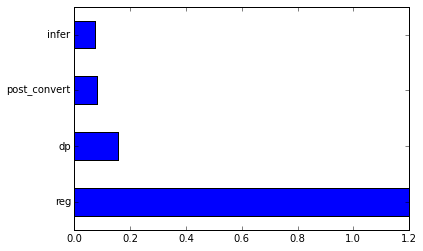

In [24]:
Series(t).sort_values(ascending=False).plot.barh()